In [1]:
import sys
sys.path.append('..')
from par_segmentation import *
from matplotlib import animation
from matplotlib_polyroi import RoiJupyter
%matplotlib notebook

In [2]:
img = load_image('nwg338_af_corrected.tif')
roi_init = np.loadtxt('nwg338_ROI_init.txt')

### Segment

In [3]:
iq = ImageQuantGradientDescent(img=img, roi=roi_init, sigma=3.5, descent_steps=400, rol_ave=5, 
                                lr=0.01, iterations=1, fit_outer=True, roi_knots=20, nfits=100, save_training=True,
                                zerocap=False, freedom=25)
iq.run()
iq.adjust_roi()
roi_final = iq.roi[0]

  0%|          | 0/400 [00:00<?, ?it/s]

Iteration 1 of 1


100%|██████████| 400/400 [00:08<00:00, 48.15it/s]


Time elapsed: 8.57 seconds 



### Images

In [4]:
from matplotlib.lines import Line2D

class LineDataUnits(Line2D):
    def __init__(self, *args, **kwargs):
        _lw_data = kwargs.pop("linewidth", 1) 
        super().__init__(*args, **kwargs)
        self._lw_data = _lw_data

    def _get_lw(self):
        if self.axes is not None:
            ppd = 72./self.axes.figure.dpi
            trans = self.axes.transData.transform
            return ((trans((1, self._lw_data))-trans((0, 0)))*ppd)[1]
        else:
            return 1

    def _set_lw(self, lw):
        self._lw_data = lw

    _linewidth = property(_get_lw, _set_lw)

<IPython.core.display.Javascript object>


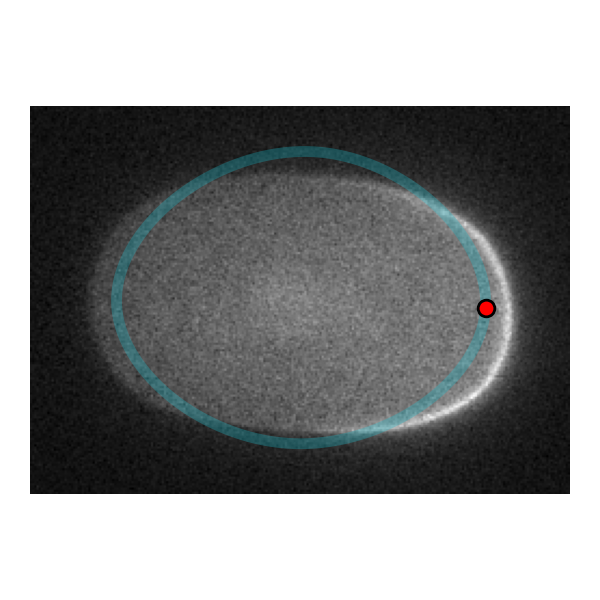

In [5]:
rotated1, rotated1_roi = rotated_embryo(img, roi_init, 250, 180, 3, return_roi=True)

fig, ax = plt.subplots()
ax.imshow(rotated1, cmap='gray', origin='lower')
# ax.plot(rotated1_roi[:, 0], rotated1_roi[:, 1], linestyle='--', c='tab:cyan')
line = LineDataUnits(rotated1_roi[:, 0], rotated1_roi[:, 1], c='tab:cyan', linewidth=5, alpha=0.3)
ax.add_line(line)
ax.scatter(rotated1_roi[0, 0], rotated1_roi[0, 1], c='r', edgecolors='k', zorder=10)
ax.axis('off')
fig.set_size_inches(3,3)
fig.tight_layout()
fig.savefig('roi_before.png', dpi=600, transparent=True)

<IPython.core.display.Javascript object>


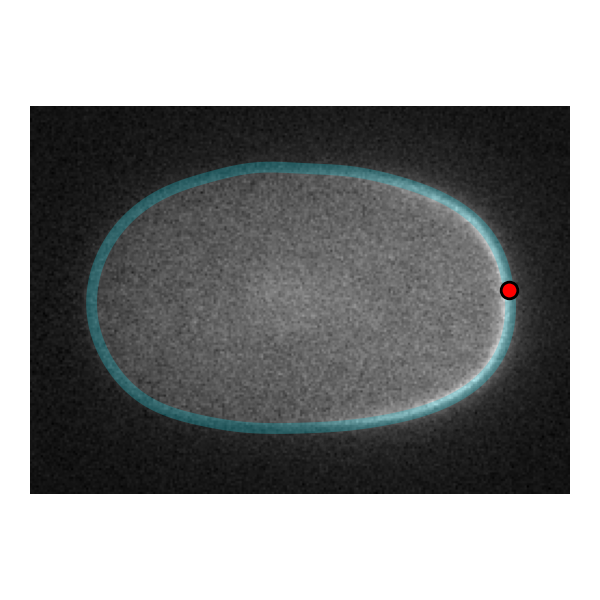

In [6]:
rotated2, rotated2_roi = rotated_embryo(img, roi_final, 250, 180, 3, return_roi=True)

fig, ax = plt.subplots()
ax.imshow(rotated2, cmap='gray', origin='lower')
# ax.plot(rotated2_roi[:, 0], rotated2_roi[:, 1], linestyle='--', c='tab:cyan')
line = LineDataUnits(rotated2_roi[:, 0], rotated2_roi[:, 1], c='tab:cyan', linewidth=5, alpha=0.3)
ax.add_line(line)
ax.scatter(rotated2_roi[0, 0], rotated2_roi[0, 1], c='r', edgecolors='k', zorder=10)
ax.axis('off')
fig.set_size_inches(3,3)
fig.tight_layout()
fig.savefig('roi_after.png', dpi=600, transparent=True)

### Straight

(50, 475)


<IPython.core.display.Javascript object>


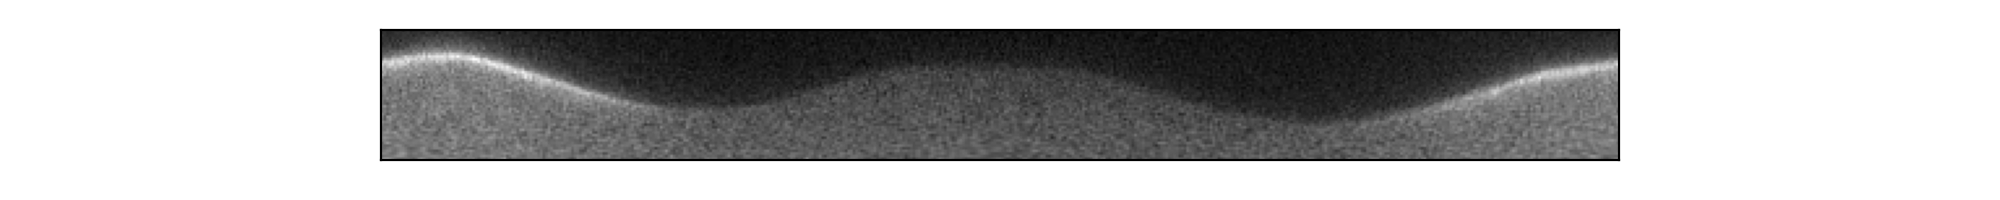

In [7]:
straight = straighten(img, roi_init, 50)
print(straight.shape)

fig, ax = plt.subplots()
ax.imshow(straight, cmap='gray')
ax.set_xticks([])
ax.set_yticks([])
fig.set_size_inches(10,1)
fig.tight_layout()
fig.savefig('straight_before.png', dpi=600, transparent=True)

(50, 512)


<IPython.core.display.Javascript object>


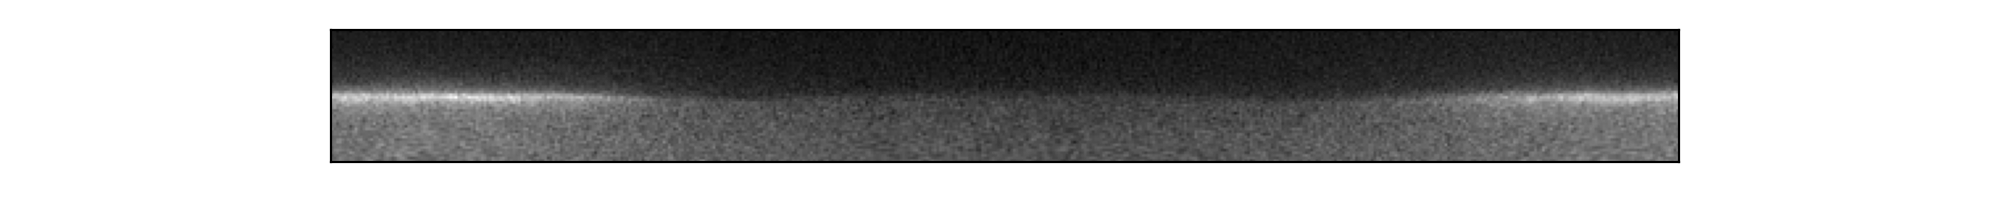

In [8]:
straight = straighten(img, roi_final, 50)
print(straight.shape)

fig, ax = plt.subplots()
ax.imshow(straight, cmap='gray')
ax.set_xticks([])
ax.set_yticks([])
fig.set_size_inches(10,1)
fig.tight_layout()
fig.savefig('straight_after.png', dpi=600, transparent=True)

### Offsets

<IPython.core.display.Javascript object>


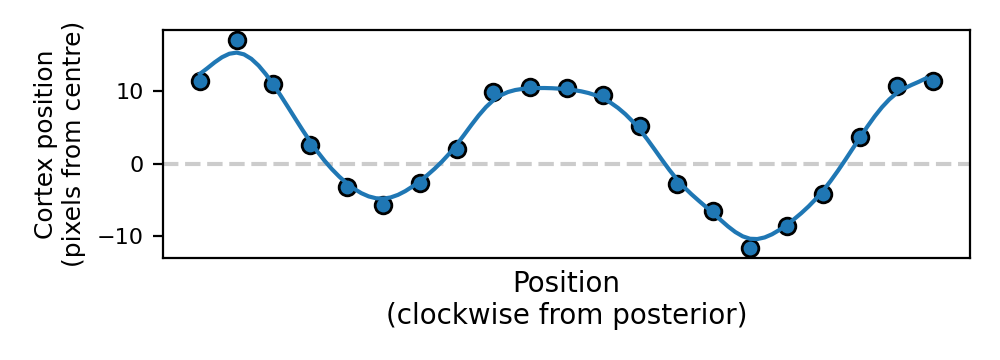

In [9]:
fig, ax = plt.subplots()

ax.plot(iq.offsets[0])
a = tf.concat((iq.offsets_t, iq.offsets_t[:, :1]), axis=1)
ax.scatter(np.linspace(0, 100, 21), iq.freedom * tf.math.tanh(a).numpy()[0], linewidth=1, edgecolors='k')
ax.axhline(0, c='k', linestyle='--', alpha=0.2, zorder=0)
ax.set_ylabel('Cortex position\n(pixels from centre)', fontsize=9)
ax.tick_params(axis='y', labelsize=8)
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_xlabel('Position\n(clockwise from posterior)')
# ax.set_xlim(0, 100)
fig.set_size_inches(5,1.8)
fig.tight_layout()
fig.savefig('offsets_spline.png', dpi=600, transparent=True)